<a href="https://colab.research.google.com/github/udaspriest/CIFAR-10_CLASSIFIER/blob/master/Cifar10_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
import sklearn
from sklearn.metrics import f1_score

Load Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


Data Preprocessing

In [3]:
# print(x_train.shape,x_test.shape)
# print(y_train.shape,y_test.shape)
# x_train[1]

In [4]:
x_train = x_train.astype('float32')
x_train/=255.0
x_test = x_test.astype('float32')
x_test/=255.0


num_classes = 10
classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [5]:
# print(x_train[0],y_train[0])
print(x_train.shape)
x_test.shape

(50000, 32, 32, 3)


(10000, 32, 32, 3)

In [6]:
from keras.applications.vgg16 import VGG16

In [7]:
pretrained_model = VGG16(include_top=False,weights='imagenet',input_shape=(32,32,3))
for layer in pretrained_model.layers:
  layer.trainable=False
pretrained_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
______________________________________________________________

In [8]:
model = tf.keras.models.Sequential([
                  #tf.keras.applications.VGG16(include_top=False,weights='imagenet',input_shape=[32,32,3]),
                  #  tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',padding= 'same',input_shape=[32,32,3]),
                  #  tf.keras.layers.MaxPooling2D((2,2)),
                  #  tf.keras.layers.BatchNormalization(),
                  #  tf.keras.layers.Conv2D(32,(3,3),padding= 'same',activation = 'relu'),
                  #  tf.keras.layers.MaxPooling2D((2,2)),
                  #  tf.keras.layers.BatchNormalization(),

                  # # #tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                  # # #tf.keras.layers.MaxPooling2D((2,2)),
                  # # tf.keras.layers.Dropout(0.25),
                  #  tf.keras.layers.Conv2D(128,(3,3),padding= 'same',activation = 'relu'),
                  #  tf.keras.layers.MaxPooling2D((2,2)),
                   pretrained_model,
                   tf.keras.layers.Flatten(),
                   tf.keras.layers.Dense(units=128,activation='relu'),
                   #tf.keras.layers.Dropout(0.25),
                   #tf.keras.layers.Dense(units=128,activation='relu'),
                   tf.keras.layers.Dense(units=64,activation='relu'),
                   tf.keras.layers.Dense(units=10,activation='softmax')

])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
#model.compile(loss = 'categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.01),metrics= ['accuracy'])
INIT_LR = 5e-3
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR),
    metrics=['accuracy']
)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(modelTf.optimizer.lr))

In [16]:
history = model.fit(x_train,
          y_train,
          batch_size=32,
          epochs=30,
          verbose = 1,
          validation_data = (x_test,y_test))

Epoch 1/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9168 - accuracy: 0.6747 - val_loss: 1.1155 - val_accuracy: 0.6181
Epoch 2/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8993 - accuracy: 0.6826 - val_loss: 1.1461 - val_accuracy: 0.6039
Epoch 3/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8846 - accuracy: 0.6862 - val_loss: 1.1374 - val_accuracy: 0.6149
Epoch 4/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8622 - accuracy: 0.6965 - val_loss: 1.1612 - val_accuracy: 0.6100
Epoch 5/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8511 - accuracy: 0.6971 - val_loss: 1.1704 - val_accuracy: 0.6121
Epoch 6/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8326 - accuracy: 0.7058 - val_loss: 1.1867 - val_accuracy: 0.6063
Epoch 7/30
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8197 - accuracy: 0.7096 - val_loss: 1.1775 -

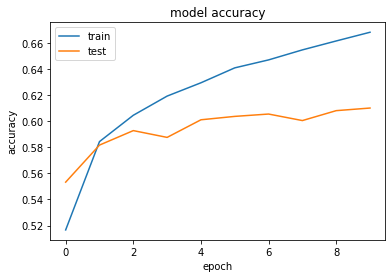

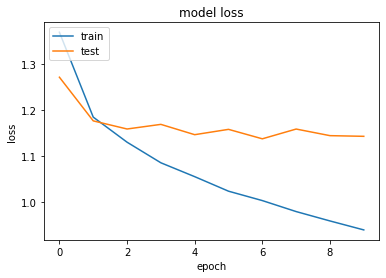

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict_classes(x_test)
y_class = [classes[y] for y in y_pred]
y_class